# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

#### **Data processing**

Importing all libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

Reading *'data'* dataset

In [2]:
data = pd.read_csv('data.csv')

Looking at the dataset

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


According to the task above `thinness 1-19 years - podíl dětí ve věku 10-19 let`, so I am going to change name of this column from `thinness 1-19 years` to `thinness 10-19 years`

In [4]:
data = data.rename(columns={'thinness  1-19 years': 'thinness  10-19 years'})

I figured some data may be outside allowed range, so I defined maximum values for some columns and replaced values outside this range (> max values or < 0) with np.nan

In [5]:
# Define maximum allowed values for each column with percentage or "per 100/per 1000" values
max_values = {
    'Adult Mortality': 1000, # per 1000 population
    'infant deaths': 1000,   # per 1000
    'percentage expenditure': 100,  # percentage cannot exceed 100
    'Hepatitis B': 100,     # percentage
    'under-five deaths': 1000,  # max per 1000
    'Measles': 1000,        #max per 1000
    'Polio': 100,          # percentage
    'Total expenditure': 100,   # percentage
    'Diphtheria': 100,     # percentage
    'HIV/AIDS': 1000,       # max per 1000
    'thinness  10-19 years': 100,  # percentage
    'thinness 5-9 years': 100,     # percentage
}

# Replace values outside allowed range with np.nan
for column, max_value in max_values.items():
    data.loc[data[column] < 0, column] = np.nan
    # Replace values exceeding maximum with np.nan
    data.loc[data[column] > max_value, column] = np.nan

Factorizing country statuses as there are only 2 possible values for this column (developed and Developing)

In [6]:
data['Status'] = pd.factorize(data['Status'])[0] #0 - Developing, 1 - Developed

I found some data inconsistencies in country statuses and fixed them

In [7]:
wrong_status = ['Estonia', 'Canada', 'Finland', 'France', 'Greece', 'Israel', 'Republic of Korea'] #countries marked as developing but are developed
for country in wrong_status:
    data.loc[data['Country'] == country, 'Status'] = 1

It seems logical that population will not have any dramatic effect on life expectancy so i decided to look at correlation between these 2

In [8]:
population_life = data['Population'].corr(data['Life expectancy'])
print(population_life)

-0.018919624010356212


As expected it shows minor dependance so I will remove this column (Population is a very unreliable information as it may change drastically during even a short period of time)

In [9]:
data = data.drop('Population', axis=1)

It is also obvious there are a lot of null values, I will fix it later in the code

In [10]:
data.isnull().sum(axis=0)

Country                               0
Year                                  0
Status                                0
Life expectancy                       0
Adult Mortality                       0
infant deaths                        13
Alcohol                             160
percentage expenditure             1205
Hepatitis B                         531
Measles                             504
BMI                                  32
under-five deaths                    16
Polio                                19
Total expenditure                   192
Diphtheria                           19
HIV/AIDS                              0
GDP                                 407
thinness  10-19 years                32
thinness 5-9 years                   32
Income composition of resources     148
Schooling                           148
dtype: int64

#### **Data splitting**

Dividing dataset into target variable and attribute matrix

In [11]:
Xdata = data.drop('Life expectancy', axis=1)
ydata = data['Life expectancy']

Splitting the data with 40% being test+val data

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=333)

Splitting test+val data in half, giving us 20% testing data and 20% validation data

In [13]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=333)

I will fill missing values using `country-specific` medians first, then `global` medians if needed. 
This helps maintain country-specific patterns while ensuring no missing values remain

In [14]:
def fill_missing_with_country_and_global_medians(train_data, data_to_fill):
    """
    Fills missing values in the data_to_fill using country-specific medians
    and global medians calculated from the train_data.
    """

    missing_columns = data_to_fill.columns[data_to_fill.isnull().any()]

    global_median = train_data[missing_columns].median()
    country_medians = train_data.groupby('Country')[missing_columns].median()

    for col in missing_columns:
        for country in data_to_fill['Country'].unique():
            country_median = country_medians.loc[country, col] if country in country_medians.index else np.nan
            
            if np.isnan(country_median):
                country_median = global_median[col]
            
            data_to_fill.loc[(data_to_fill['Country'] == country) & (data_to_fill[col].isnull()), col] = country_median
    
    return data_to_fill

# Apply the function to each dataset
Xtrain = fill_missing_with_country_and_global_medians(Xtrain, Xtrain)
Xval = fill_missing_with_country_and_global_medians(Xtrain, Xval)
Xtest = fill_missing_with_country_and_global_medians(Xtrain, Xtest)

It seems logical that country name itself does not affect life expectancy, so I will drop this column

In [15]:
Xtrain = Xtrain.drop('Country', axis=1)
Xval = Xval.drop('Country', axis=1)
Xtest = Xtest.drop('Country', axis=1)

#### **Random forest**

In [16]:
########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.trees = []
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        num_samples = X.shape[0]
        n_bootstrap_samples = round(num_samples * self.max_samples)
        for _ in range(self.n_estimators):
            X_bootstrap, y_bootstrap = resample(X, y, n_samples = n_bootstrap_samples, random_state = 333)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            tree.fit(X_bootstrap, y_bootstrap)

            self.trees.append(tree)
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        for tree in self.trees:
            ypredicted += tree.predict(X)
        return ypredicted / self.n_estimators

In [17]:
param_grid = {
    'n_estimators': list(range(10, 201, 25)),
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth': [3, 5, 9, 11, 13, 15],
    'max_features': ['sqrt', 'log2']
}

grid = ParameterGrid(param_grid)

In [18]:
results = []

for params in grid:
    model = CustomRandomForest(**params)
    model.fit(Xtrain, ytrain)
    rmse_train = np.sqrt(mean_squared_error(ytrain, model.predict(Xtrain)))
    rmse_val = np.sqrt(mean_squared_error(yval, model.predict(Xval)))
    results.append((rmse_val, rmse_train, params))

sorted_results = sorted(results, key=lambda result: result[0])

best_rmse_val, best_rmse_train, best_params = sorted_results[0]
print("Best parameters:", best_params)
print("RMSE for training dataset:", best_rmse_train)
print("RMSE for validation dataset:", best_rmse_val)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 1.0, 'n_estimators': 35}
RMSE for training dataset: 1.198693073218471
RMSE for validation dataset: 2.0553149235496213


In [19]:
best_forest = CustomRandomForest(**best_params)
best_forest.fit(Xtrain, ytrain)

In [20]:
best_rmse = np.sqrt(mean_squared_error(yval, best_forest.predict(Xval)))
best_mae = mean_absolute_error(yval, best_forest.predict(Xval))

In [21]:
print(f"RMSE for validation dataset: {best_rmse}")
print(f"MAE for validation dataset: {best_mae}")

RMSE for validation dataset: 2.1490129284060133
MAE for validation dataset: 1.352619469147675


#### **Ridge regression**

To choose between Linear and Ridge regression I want to look at correlation matrix to see if there is multicollinearity in the dataset

<Axes: >

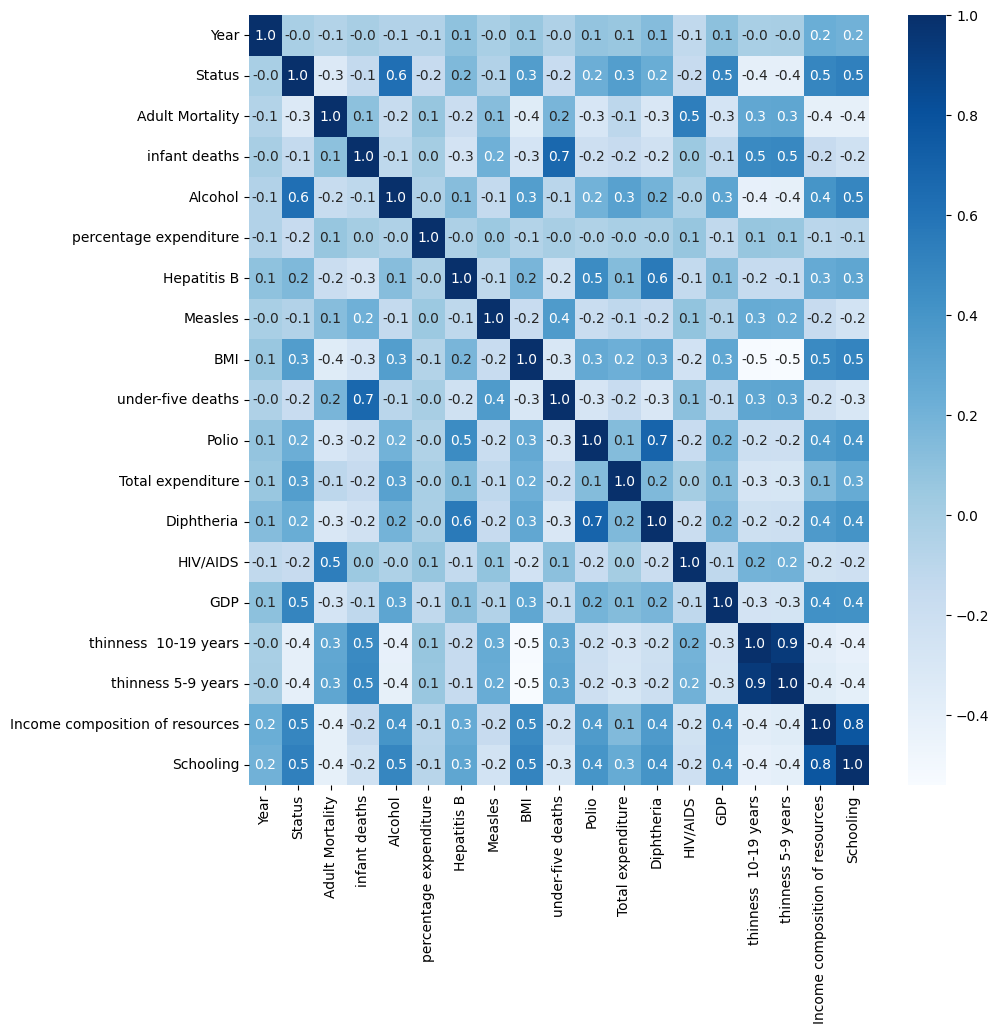

In [22]:
corr_matrix = Xtrain.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="Blues")

Given the presence of multicollinearity in this dataset, Ridge regression is a better choice because it regularizes the coefficients, reducing overfitting and improving generalization

Validation RMSE: 4.06701
Validation MAE: 3.10239


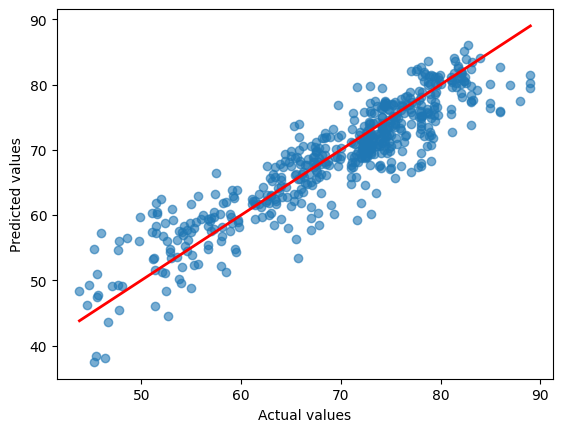

In [23]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.fit_transform(Xval)


clf_ridge = Ridge(1)
clf_ridge.fit(Xtrain_scaled, ytrain)
RMSE_val_ridge = np.sqrt(mean_squared_error(yval, clf_ridge.predict(Xval_scaled)))
print(f'Validation RMSE: {RMSE_val_ridge:.5f}')
MAE_val_ridge = mean_absolute_error(yval, clf_ridge.predict(Xval_scaled))
print(f'Validation MAE: {MAE_val_ridge:.5f}')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.scatter(yval, clf_ridge.predict(Xval_scaled), alpha=0.6)
plt.plot([yval.min(), yval.max()], [yval.min(), yval.max()], lw=2, color="r")
plt.show()

Next I will try to find the optimal regularization parameter for Ridge regression model. The parameter `alpha` controls the strength of this regularization: a higher alpha means more regularization, while a lower alpha means less.

In [24]:
from scipy import optimize

def get_opt_ridge_model(Xtrain, Xval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return np.sqrt(mean_squared_error(yval, clf.predict(Xval)))

    alphas = np.linspace(1,500,100)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # Find Ridge alpha automatically
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 30}, method = 'bounded', bounds=(0.1, 400))
    print('Optimal alpha', opt_alpha)
    print("\n")

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(Xtrain, ytrain)
    return clf_opt_ridge

Plotting optimized Ridge regression and printing validation RMSE and MAE

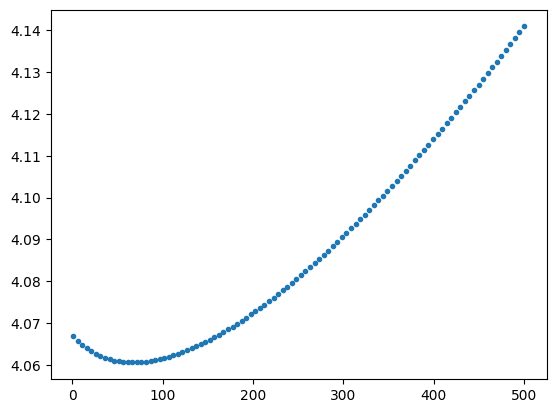

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 4.060616335586196
       x: 66.65339396556301
     nit: 19
    nfev: 19


Validation RMSE: 4.06062
Validation MAE: 3.10361


In [25]:
clf_opt_ridge = get_opt_ridge_model(Xtrain_scaled, Xval_scaled)
RMSE_val_opt_ridge = np.sqrt(mean_squared_error(yval, clf_opt_ridge.predict(Xval_scaled)))
print(f'Validation RMSE: {RMSE_val_opt_ridge:.5f}')
MAE_val_opt_ridge = mean_absolute_error(yval, clf_opt_ridge.predict(Xval_scaled))
print(f'Validation MAE: {MAE_val_opt_ridge:.5f}')

#### **AdaBoost**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics

In [27]:
param_grid = {
    'n_estimators': range(10, 50, 5),
    'max_depth': range(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1]
}
param_comb = ParameterGrid(param_grid)

In [28]:
from sklearn.metrics import root_mean_squared_error

val_metric = []
train_metric = []

for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth=dt_depth)
    dt = AdaBoostRegressor(**params, random_state=333).fit(Xtrain, ytrain)
    
    val_metric.append(root_mean_squared_error(yval, dt.predict(Xval)))
    train_metric.append(root_mean_squared_error(ytrain, dt.predict(Xtrain)))

AdaBoost improves weak classifiers by combining them into a strong classifier. It focuses on difficult samples by giving them higher weights, reducing bias and variance. It works well with simple models like decision stumps, is less prone to overfitting, and is effective for classification tasks. 

In [29]:
best_AdaBoost = AdaBoostRegressor(
    **params,
    random_state=333
)
best_AdaBoost.fit(Xtrain, ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9), learning_rate=1,
                  n_estimators=45, random_state=333)

Validation RMSE: 1.921008253044362
Validation MAE: 1.2011525381044754


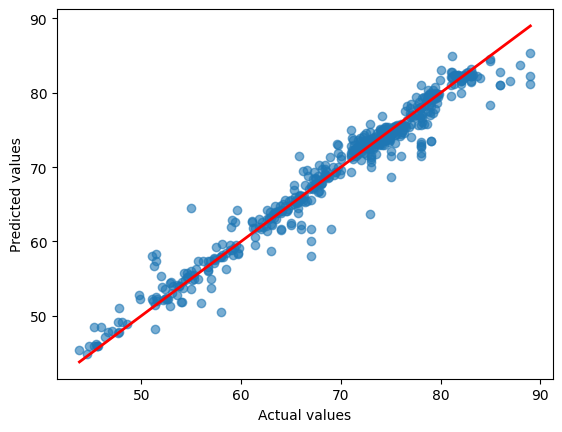

In [30]:
rmse_ada = np.sqrt(mean_squared_error(yval, best_AdaBoost.predict(Xval)))
mae_ada = mean_absolute_error(yval, best_AdaBoost.predict(Xval))
print(f"Validation RMSE: {rmse_ada}")
print(f"Validation MAE: {mae_ada}")

plt.scatter(yval, best_AdaBoost.predict(Xval), alpha=0.6)
plt.plot([yval.min(), yval.max()], [yval.min(), yval.max()], lw=2, color="r")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

As we can see, this codel gave us the `lowest` RMSE and MAE results, which means its redictions are the most accurate

#### **Best model**

**I chose AdaBoost model because of RMSE and MAE results, which are lower for this model than for any other one (being 1.92 and 1.2 respectfully)**

In [45]:
best_model = best_AdaBoost

In [46]:
y_pred_test_ada = best_model.predict(Xtest)
rmse_test = np.sqrt(mean_squared_error(ytest, y_pred_test_ada))
mae_test = mean_absolute_error(ytest, y_pred_test_ada)

print("RMSE on test data:", rmse_test)
print("MAE on test data:", mae_test)

RMSE on test data: 1.9956272525544532
MAE on test data: 1.3016702240107634


We can see that RMSE on test data is around 2 and MAE is around 1.3, indicating that on average the model predicts life expectancy with a deviation of approximately two years from actual values. These RMSE and MAE values on the test data can be used as an estimate of the error we can expect on unseen data.